In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data_raw/Raw Data.csv")
data.tail()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
1181,11.858905,0.119302,0.133373,9.822424,9.824054
1182,11.868943,0.114063,0.134121,9.774524,9.776109
1183,11.878981,0.111518,0.126786,9.726174,9.727640
1184,11.889019,0.128882,0.104483,9.761052,9.762462
1185,11.899057,0.125439,0.117356,9.769135,9.770645


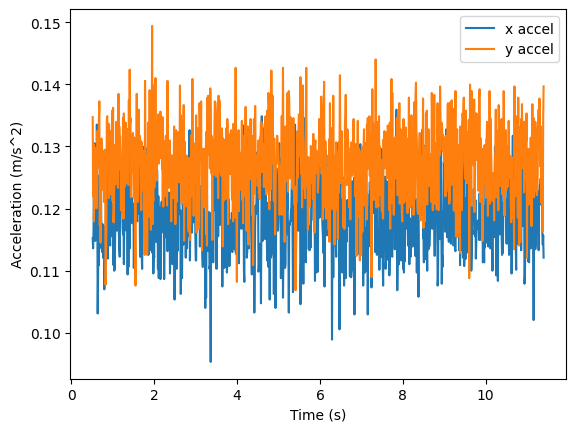

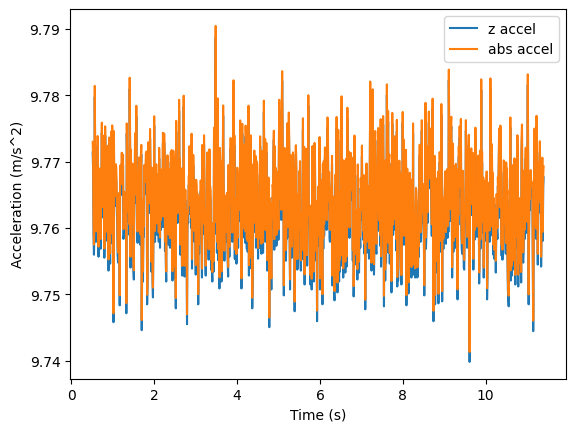

In [14]:
plt.figure()
# data.plot(x='Time (s)', y='Acceleration x (m/s^2)')
plt.plot(data['Time (s)'], data['Acceleration x (m/s^2)'], label='x accel')
plt.plot(data['Time (s)'], data['Acceleration y (m/s^2)'], label='y accel')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

plt.figure()
plt.plot(data['Time (s)'], data['Acceleration z (m/s^2)'], label='z accel')
plt.plot(data['Time (s)'], data['Absolute acceleration (m/s^2)'], label='abs accel')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()

In [5]:
# Truncate the data, 50 on each side, which is around .5 seconds on either side. 
#data = data.iloc[50:]
# data = data.iloc[:50]
print('Len before truncation: ', data.shape[0])
data = data.iloc[50:]
data = data.iloc[:-50]
print('Len after truncation: ', data.shape[0])


Len before truncation:  1186
Len after truncation:  1086


In [6]:
mean_abs = numpy.mean(data['Absolute acceleration (m/s^2)'])
data['Compensated'] = data['Absolute acceleration (m/s^2)']-mean_abs
data.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2),Compensated
50,0.512602,0.115260,0.134720,9.771380,9.772989,0.008634
51,0.522632,0.113614,0.121996,9.768686,9.770108,0.005754
52,0.532662,0.116458,0.130379,9.759106,9.760671,-0.003683
53,0.542691,0.125439,0.117955,9.755962,9.757482,-0.006872
54,0.552721,0.130529,0.123344,9.758956,9.760608,-0.003746


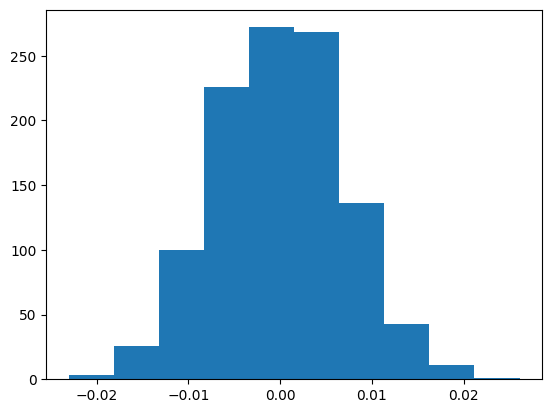

The standard deviation is 0.006921277621315108


In [7]:
# Histogram of the compensated
plt.figure()
plt.hist(data['Compensated'])
plt.show()

absolute = data['Compensated'].to_numpy()
standard_deviation = numpy.std(absolute)

print('The standard deviation is', standard_deviation)

Resolution 0.006921277621315108


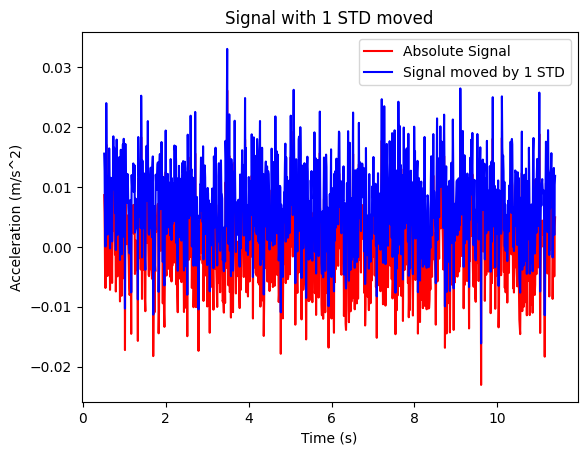

In [54]:
data['moved std'] = data['Compensated'] + standard_deviation
print('Resolution', f'{standard_deviation}')
plt.figure()
plt.plot(data['Time (s)'], data['Compensated'], color='red', label='Absolute Signal')
plt.plot(data['Time (s)'], data['moved std'], color='blue', label='Signal moved by 1 STD')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Signal with 1 STD moved')
plt.legend()
plt.show()

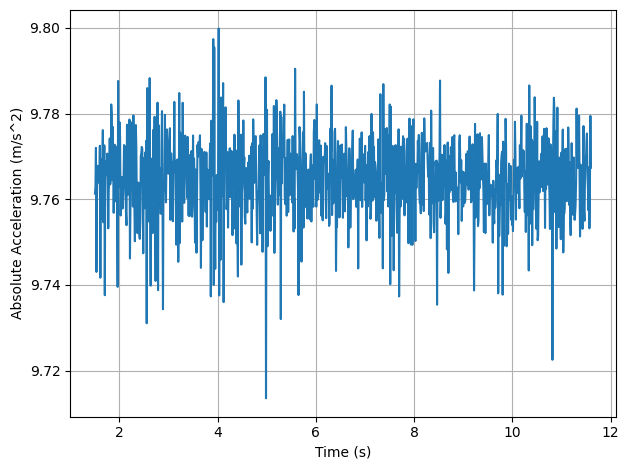

In [48]:
# 4.4 Filtering

data_shaking = pd.read_csv("./data_raw/Raw Data_Shaking_2.csv")
data_shaking = data_shaking.iloc[150:]
data_shaking = data_shaking.iloc[:-150]

plt.figure()
plt.plot(data_shaking['Time (s)'], data_shaking['Absolute acceleration (m/s^2)'], label='abs accel')
plt.xlabel('Time (s)')
plt.ylabel('Absolute Acceleration (m/s^2)')
plt.tight_layout()

plt.grid()
plt.show()

In [49]:
# Moving average filter
def moving_average(signal, window_size):
    sig = numpy.array(signal)
    i = 0
    moving_averages = []
    while i < len(sig) - window_size + 1:
        # Store elements from i to i+window_size
        window = signal[i : i + window_size]

        # Calculate the average of current window
        window_average = numpy.mean(window)
        # Store the average of current window
        moving_averages.append(window_average)

        # Shift window
        i += 1
    return moving_averages

In [50]:
def moving_average2(signal, window_size):
    """
    Compute the moving average of a time signal using a given window size.

    Parameters:
    signal (numpy.ndarray): The input time signal.
    window_size (int): The size of the moving window.

    Returns:
    numpy.ndarray: The moving average of the input signal.
    """
    # Define the convolution kernel for computing the moving average
    kernel = numpy.ones(window_size) / window_size

    # Use numpy.convolve() to compute the moving average
    moving_avg = numpy.convolve(signal, kernel, mode='same')

    return moving_avg


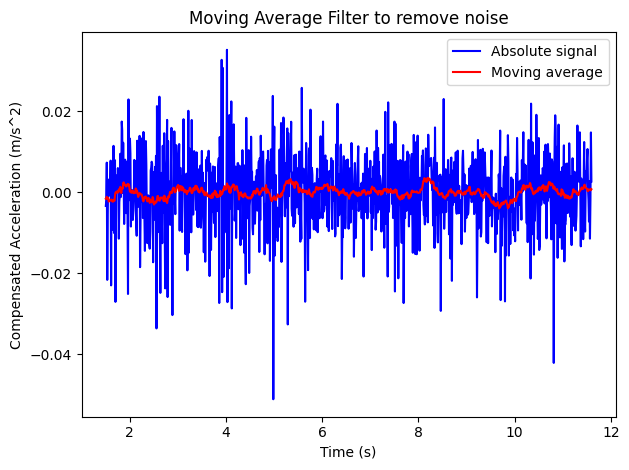

In [53]:
# signal = data_shaking['Absolute acceleration (m/s^2)'].to_numpy()
mean_abs_shake = numpy.mean(data_shaking['Absolute acceleration (m/s^2)'])
data_shaking['Compensated'] = data_shaking['Absolute acceleration (m/s^2)']-mean_abs_shake
signal = data_shaking['Compensated'].to_numpy()
ma = moving_average2(signal, 30)

plt.figure()
plt.grid()
plt.plot(data_shaking['Time (s)'], signal, color='blue', label='Absolute signal')
plt.plot(data_shaking['Time (s)'], ma, color='red', label='Moving average')
# plt.ylim((9.7,9.8))
# plt.xlim((2, 10.5))
plt.xlabel('Time (s)')
plt.ylabel('Compensated Acceleration (m/s^2)')
plt.title('Moving Average Filter to remove noise')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


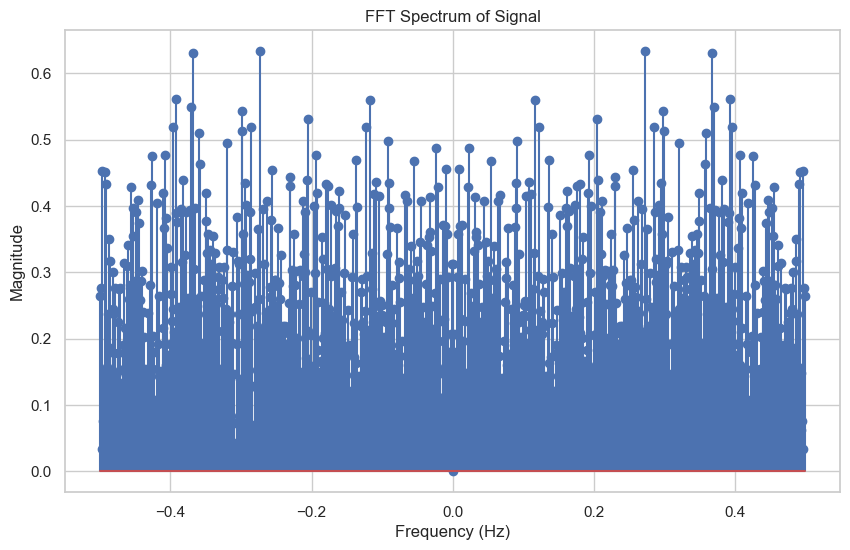

In [120]:

import numpy as np

fft_result = np.fft.fft(signal)

magnitude_spectrum = np.abs(fft_result)

# Compute the frequency axis
sampling_rate = 1  # Assuming unit sampling rate (you can adjust this if needed)
n = len(signal)
freq = np.fft.fftfreq(n, d=1/sampling_rate)

# Plot the FFT spectrum using stem plot
plt.figure(figsize=(10, 6))
plt.stem(freq, magnitude_spectrum, basefmt="r")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Spectrum of Signal')
plt.grid(True)
plt.show()